<a href="https://colab.research.google.com/github/nithinkumar888/AIML/blob/main/lab%20exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [6]:
data, meta = arff.loadarff('/content/Absenteeism_at_work.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Convert numeric columns to appropriate types
numeric_cols = ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Age', 'Education', 'Absenteeism_time_in_hours']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


<ipython-input-6-0c7f6990b2ec>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [7]:
top_5_reasons = df['Reason_for_absence'].value_counts().head(5)


In [8]:
absenteeism_by_day = df['Day_of_the_week'].value_counts()
most_absent_day = absenteeism_by_day.idxmax()


In [9]:
min_age = df['Age'].min()
max_age = df['Age'].max()


In [10]:
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
    11: 'Fall', 12: 'Winter'
}
df['Season'] = df['Month_of_absence'].map(month_to_season)
absenteeism_by_season = df['Season'].value_counts()


In [11]:
highest_education = df['Education'].value_counts().idxmax()


In [12]:
X = df.drop(columns=['Absenteeism_time_in_hours'], errors='ignore')
y = df['Absenteeism_time_in_hours']
X = pd.get_dummies(X, drop_first=True)
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


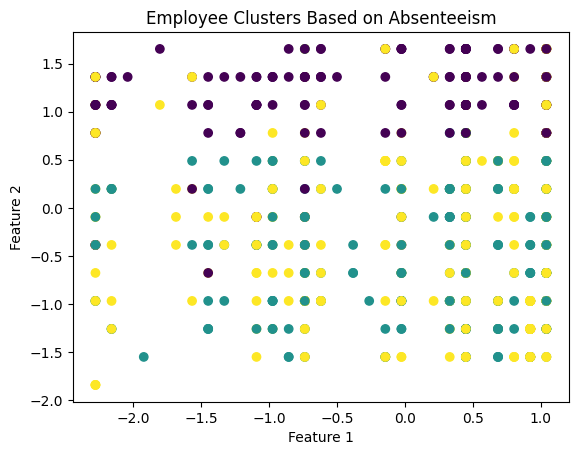

In [13]:
scaled_data = StandardScaler().fit_transform(df.select_dtypes(include=[np.number]).fillna(0))
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Employee Clusters Based on Absenteeism')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
